<a href="https://colab.research.google.com/github/JackRossProjects/Sprint-Warmups/blob/master/Statistics_Q%26A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=' ?')

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Chi^2 Test

## What does the chi^2 test, test for?

1) Test for Independence/dependence

What does Independence Mean? It means that there's no relationship between two variables (columns) of my dataframe.

The opposite of independence is dependence. If two things are dependent, they are likely to be correlated. (relationship, association)

### Null Hypothesis: Independent (No Relationship)

### Alternative Hypothesis: Dependent (Relationship)

### Confidence Level: 95%

**A chi^2 test can only be done on categorical variables.**

## I want to do a chi^2 test for gender/sex and hours worked per week.

Our intuition tells us that we would expect these to variables to be related.


In [0]:
df['sex'].describe()

count     32561
unique        2
top        Male
freq      21790
Name: sex, dtype: object

In [0]:
df['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [0]:
df['hours-per-week'].describe()

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

In [0]:
df['hours-per-week'].value_counts()

40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
92        1
94        1
87        1
74        1
82        1
Name: hours-per-week, Length: 94, dtype: int64

In [0]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
country           object
salary            object
dtype: object

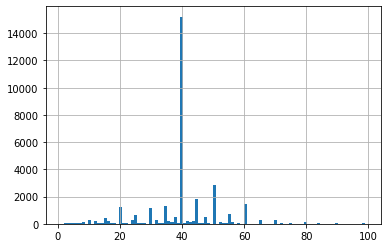

In [0]:
df['hours-per-week'].hist(bins=100);

In [0]:
pd.crosstab(df['hours-per-week'], df['sex'])

sex,Female,Male
hours-per-week,,
1,10,10
2,14,18
3,14,25
4,32,22
5,32,28
...,...,...
95,0,2
96,0,5
97,0,2


## Bin the hours-per-week column so that it has fewer categories

In [0]:
# margins=True will include the row and column totals in the table
pd.crosstab(df['40_hours'], df['sex'], margins=True)

sex,Female,Male,All
40_hours,,,
< 40 hours,4107,3656,7763
>= 40 hours,6664,18134,24798
All,10771,21790,32561


In [0]:
cut_points = [0,39,1000]
bin_names = ['< 40 hours', '>= 40 hours']

df['40_hours'] = pd.cut(df['hours-per-week'], cut_points, labels=bin_names)

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,hours_per_week_bins,40_hours
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,40-49,>= 40 hours
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,10-19,< 40 hours
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,40-49,>= 40 hours
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,40-49,>= 40 hours
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,40-49,>= 40 hours


In [0]:
# The values that I want to separate the bins
cut_points = [0,9,19,29,39,49,1000]
bin_names = ['0-9', '10-19', '20-29', '30-39', '40-49', '50+']

df['hours_per_week_bins'] = pd.cut(df['hours-per-week'], cut_points, labels=bin_names)

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,hours_per_week_bins,40_hours
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,40-49,>= 40 hours
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,10-19,< 40 hours
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,40-49,>= 40 hours
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,40-49,>= 40 hours
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,40-49,>= 40 hours


In [0]:
df['hours_per_week_bins'].describe()

count     32561
unique        6
top       40-49
freq      18336
Name: hours_per_week_bins, dtype: object

In [0]:
contingency_table = pd.crosstab(df['sex'], df['hours_per_week_bins'])

contingency_table

hours_per_week_bins,0-9,10-19,20-29,30-39,40-49,50+
sex,,,,,,
Female,235,671,1287,1914,5636,1028
Male,223,575,1105,1753,12700,5434


In [0]:
from scipy import stats

chi2, p_value, dof, expected_value_table = stats.chi2_contingency(contingency_table)

print("Chi^2 Statistic:", chi2)
print("P value:", p_value)
print("Degrees of Freedom", dof)
print('Expected Value Table: \n', expected_value_table)

Chi^2 Statistic: 2287.190943926107
P value: 0.0
Degrees of Freedom 5
Expected Value Table: 
 [[  151.50388502   412.16995793   791.26046497  1213.02346365
   6065.44811277  2137.59411566]
 [  306.49611498   833.83004207  1600.73953503  2453.97653635
  12270.55188723  4324.40588434]]


We compared our p-value to .05, since it is less than .05 we reject the null hypothesis.

1 - Confidence_Level = .05

1 - .95 = .05

In [0]:
?stats.chi2_contingency

### Conclusion:

Based on a Chi^2 statistic of 2287 and a p-value of 0, I **reject** the null hypothesis that sex and hours-worked-per-week-bins are independent and suggest the alternative, that they are associated. 

# Calculate our Chi^2 statistic using NumPy

In [0]:
contingency_table

hours_per_week_bins,0-9,10-19,20-29,30-39,40-49,50+
sex,,,,,,
Female,235,671,1287,1914,5636,1028
Male,223,575,1105,1753,12700,5434


In [0]:
contingency_with_margins = pd.crosstab(df['sex'], df['hours_per_week_bins'], margins=True)

contingency_with_margins

hours_per_week_bins,0-9,10-19,20-29,30-39,40-49,50+,All
sex,,,,,,,
Female,235,671,1287,1914,5636,1028,10771
Male,223,575,1105,1753,12700,5434,21790
All,458,1246,2392,3667,18336,6462,32561


### Calculate our Expected Value Table

Expected Value Table: What I would expect the values in the contingency table to be **if the null hypothesis (independence) were true**.

For any given cell in our contingency table. The expected value for that cell is calculated by: 

\begin{align}
expected_{i,j} = \frac{(\text{row total})(\text{column total})}{\text{(sample size)}}
\end{align}

In [0]:
# What proportion of people would we expect to work 0-9 hours per week?
458 / 32561

0.01406590706673628

In [0]:
# What proportion of people would we expect to be female?
10771 / 32561

0.33079450876815825

In [0]:
(458 / 32561)*(10771 / 32561)

0.004652924818519593

In [0]:
(458 / 32561)*(10771 / 32561) * 32561

151.50388501581648

In [0]:
# The expepcted value for cell: (row 1, column 1)
(458)*(10771)/32561

151.50388501581648

## Make the Expected Value Table

All that the next 3 cells are doing is pulling the values out of my table, into lists that I can loop over in order to do the calculation of the expected values.

In [0]:
# Grab the crosstab cells that correspond to the females
femalecount = contingency_table.iloc[0][0:6].values
femalecount

array([ 235,  671, 1287, 1914, 5636, 1028])

In [0]:
# Grab the crosstab cells that correspond to the females
malecount = contingency_table.iloc[1][0:6].values
malecount

array([  223,   575,  1105,  1753, 12700,  5434])

In [0]:
# Calculate row and column totals to use in the expected value calculations
row_sums = contingency_with_margins.iloc[0:2, 6].values
col_sums = contingency_with_margins.iloc[2, 0:6].values

total = contingency_with_margins.loc['All','All']

print(row_sums)
print(col_sums)
print(total)

[10771 21790]
[  458  1246  2392  3667 18336  6462]
32561


In [0]:
# Now we have everything that we need to calculate our table of expected values
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)
  
expected = np.array(expected)

expected

array([[  151.50388502,   412.16995793,   791.26046497,  1213.02346365,
         6065.44811277,  2137.59411566],
       [  306.49611498,   833.83004207,  1600.73953503,  2453.97653635,
        12270.55188723,  4324.40588434]])

## Calculating the chi^2 Statistic

The chi^2 statistic is a number that represents how different my observed values contingency table (comes from my data/sample) is from the expected value table. 

If they're very similar then it's likely that the null hypothesis is true.

If they're very different, then it's likely that the null hypothesis is false.

When we want to know how different two numbers are, we often calculate what is called a "squared deviation" just like in the numerator of the chi^2 static calculation

\begin{align}
\chi^2 = \sum \frac{(observed_{i}-expected_{i})^2}{(expected_{i})}
\end{align}

In [0]:
observed = contingency_table
observed

hours_per_week_bins,0-9,10-19,20-29,30-39,40-49,50+
sex,,,,,,
Female,235,671,1287,1914,5636,1028
Male,223,575,1105,1753,12700,5434


In [0]:
expected

array([[  151.50388502,   412.16995793,   791.26046497,  1213.02346365,
         6065.44811277,  2137.59411566],
       [  306.49611498,   833.83004207,  1600.73953503,  2453.97653635,
        12270.55188723,  4324.40588434]])

In [0]:
# Row 1 Column 5 of both of my tables
# I will do this calculation with all of the cells of the table
# And then add them all up
(5636 - 6065.448)**2 / 6065.448

30.405929570907254

In [0]:
chi_squared = (((observed - expected)**2)/expected).sum().sum()

chi_squared

2287.1909439261076

1) Calculate a Contingency Table for my observed data (crosstab)

2) Calculate the Expected Value Table for my data: (row_total)(column_total)/(sample_size)

3) I figure out how different those two tables are by looking at the squared deviation between the two divided by the expected value.

4) Sum up all of the squared deviation values to get one single value that serves as my chi^2 statistic

## How does the chi^2 statistic result in a p-value?

<https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html>

1) How many Degrees of Freedom?

(# rows - 1)*(# columns - 1)

(2 - 1)(6 - 1) = 

5 degrees of freedom